<a href="https://colab.research.google.com/github/Kostratana/NASA_project/blob/main/%22NASA_project_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5-This code demonstrates how to create a DataFrame from star names, apply One-Hot Encoding and Label Encoding to the star types, and output the results.


In [ ]:
import pandas as pd

# Example data
data = {
    'star_type': ['Kepler-22b', 'Kepler-16b', 'Kepler-186f', 'Kepler-442b', 'Kepler-69c']  # Original star names from NASA archive
}

# Create DataFrame
df = pd.DataFrame(data)

# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['star_type'], prefix='star_type')

# Label Encoding
df['star_type_encoded'] = df['star_type'].astype('category').cat.codes

# Output results
print("Data with One-Hot Encoding:")
print(df_one_hot)

print("\nData with Label Encoding:")
print(df)



Data with One-Hot Encoding:
   star_type_Kepler-16b  star_type_Kepler-186f  star_type_Kepler-22b  star_type_Kepler-442b  star_type_Kepler-69c
0                 False                  False                  True                  False                 False
1                  True                  False                 False                  False                 False
2                 False                   True                 False                  False                 False
3                 False                  False                 False                   True                 False
4                 False                  False                 False                  False                  True

Data with Label Encoding:
     star_type  star_type_encoded
0   Kepler-22b                  2
1   Kepler-16b                  0
2  Kepler-186f                  1
3  Kepler-442b                  3
4   Kepler-69c                  4


6- This code creates a DataFrame from a list of planet names, applies One-Hot Encoding and Label Encoding to convert the categorical data into numerical format, and then outputs the results for both encoding methods.

In [ ]:
import pandas as pd

# Example data
data = {
    'planet_names': ['Kepler-22b', 'Kepler-16b', 'Kepler-186f', 'Kepler-442b', 'Kepler-69c']  # Original planet names from NASA archive
}

# Create DataFrame
df = pd.DataFrame(data)

# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['planet_names'], prefix='planet_names')

# Label Encoding
df['planet_names_encoded'] = df['planet_names'].astype('category').cat.codes

# Output results
print("Data with One-Hot Encoding:")
print(df_one_hot)

print("\nData with Label Encoding:")
print(df)


Data with One-Hot Encoding:
   planet_names_Kepler-16b  planet_names_Kepler-186f  planet_names_Kepler-22b  planet_names_Kepler-442b  planet_names_Kepler-69c
0                    False                     False                     True                     False                    False
1                     True                     False                    False                     False                    False
2                    False                      True                    False                     False                    False
3                    False                     False                    False                      True                    False
4                    False                     False                    False                     False                     True

Data with Label Encoding:
  planet_names  planet_names_encoded
0   Kepler-22b                     2
1   Kepler-16b                     0
2  Kepler-186f                     1
3  Kepler-442b         

7-This code creates a DataFrame from example data, splits it into features and labels, applies SMOTE for oversampling to balance the classes, trains a Random Forest classifier with adjusted class weights, and evaluates the model's performance using a classification report.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

# Example data
data = {
    'factor_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'factor_2': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'label': ['life possible', 'life possible', 'life possible',
              'life impossible', 'life impossible',
              'life impossible', 'life impossible',
              'life impossible', 'life impossible',
              'life impossible']
}

# Create DataFrame
df = pd.DataFrame(data)

# Split data into features and labels
X = df[['factor_1', 'factor_2']]
y = df['label']

# Split into training and testing sets while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check class balance before oversampling
print("Before oversampling:")
print(y_train.value_counts())

# Oversample using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Reduce the number of neighbors to 1
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class balance after oversampling
print("\nAfter oversampling:")
print(y_resampled.value_counts())

# Train model with class weight adjustment
# Use unique labels from y_train
unique_classes = np.unique(y_train)
class_weights = class_weight.compute_class_weight('balanced', classes=unique_classes, y=y_train)

# Create a dictionary for class weights
class_weight_dict = {label: weight for label, weight in zip(unique_classes, class_weights)}

model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions and model evaluation
y_pred = model.predict(X_test)
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Before oversampling:
label
life impossible    6
life possible      2
Name: count, dtype: int64

After oversampling:
label
life impossible    6
life possible      6
Name: count, dtype: int64

Classification report:
                 precision    recall  f1-score   support

life impossible       1.00      1.00      1.00         1
  life possible       1.00      1.00      1.00         1

       accuracy                           1.00         2
      macro avg       1.00      1.00      1.00         2
   weighted avg       1.00      1.00      1.00         2



8-This code analyzes the relationship between factors and the possibility of life on different planets using a correlation matrix, applies SMOTE for class balancing, trains a Random Forest classifier, and evaluates the model's performance with a classification report.


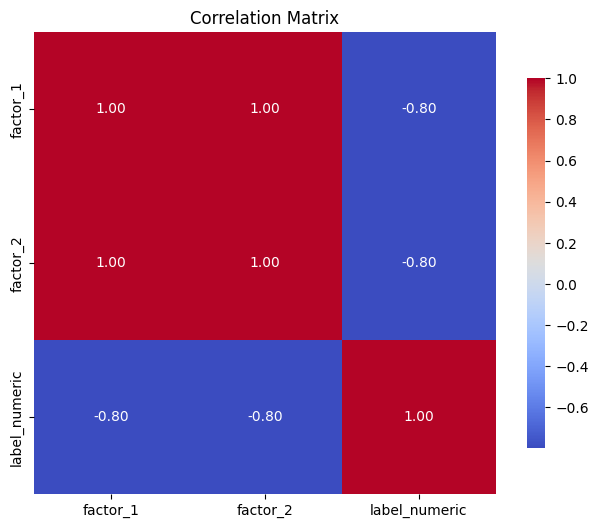

Before oversampling:
label
life impossible    6
life possible      2
Name: count, dtype: int64

After oversampling:
label
life impossible    6
life possible      6
Name: count, dtype: int64

Classification report:
                 precision    recall  f1-score   support

life impossible       1.00      1.00      1.00         1
  life possible       1.00      1.00      1.00         1

       accuracy                           1.00         2
      macro avg       1.00      1.00      1.00         2
   weighted avg       1.00      1.00      1.00         2



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

# Example data for planet names
planet_data = {
    'planet_names': ['Kepler-22b', 'Kepler-16b', 'Kepler-186f', 'Kepler-442b', 'Kepler-69c']  # Original planet names from NASA archive
}

# Create DataFrame for planet names
planet_df = pd.DataFrame(planet_data)

# Example data for factors and labels
data = {
    'factor_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'factor_2': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'label': ['life possible', 'life possible', 'life possible',
              'life impossible', 'life impossible',
              'life impossible', 'life impossible',
              'life impossible', 'life impossible',
              'life impossible']
}

# Create DataFrame for factors and labels
df = pd.DataFrame(data)

# Convert class labels to numeric format
df['label_numeric'] = df['label'].map({'life possible': 1, 'life impossible': 0})

# Calculate correlation only for numeric columns
correlation_matrix = df[['factor_1', 'factor_2', 'label_numeric']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Split data into features and labels
X = df[['factor_1', 'factor_2']]
y = df['label']

# Split into training and testing sets while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check class balance before oversampling
print("Before oversampling:")
print(y_train.value_counts())

# Oversample using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Reduce the number of neighbors to 1
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class balance after oversampling
print("\nAfter oversampling:")
print(y_resampled.value_counts())

# Train model with class weight adjustment
# Use unique labels from y_train
unique_classes = np.unique(y_train)
class_weights = class_weight.compute_class_weight('balanced', classes=unique_classes, y=y_train)

# Create a dictionary for class weights
class_weight_dict = {label: weight for label, weight in zip(unique_classes, class_weights)}

model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions and model evaluation
y_pred = model.predict(X_test)
print("\nClassification report:")
print(classification_report(y_test, y_pred))
